In [ ]:
from google.colab import drive
drive.mount("/drive")

Mounted at /drive


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

import numpy as np
import cv2
import math
from google.colab.patches import cv2_imshow
from scipy.signal import find_peaks
from scipy import signal
import skimage.measure 

In [ ]:
file_name = '/drive/MyDrive/Roopsa Sen/Raw Data/TOFD3.xlsx'
sheet = 'TOFD3'
df = pd.read_excel(io=file_name, sheet_name=sheet)
df = df[df.iloc[:,1] != '---']
df = df.astype(float)
#print(df.head(5)) 
im_arr = df.to_numpy()

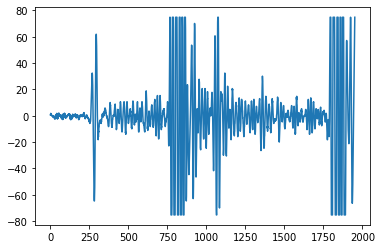

In [ ]:
scan_x = 550
A_scan = pd.DataFrame()
A_scan['value'] = im_arr[scan_x]
plt.plot(A_scan)

In [ ]:
im_arr1 = cv2.normalize(im_arr, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
im_arr1 = im_arr1.astype(np.uint8)

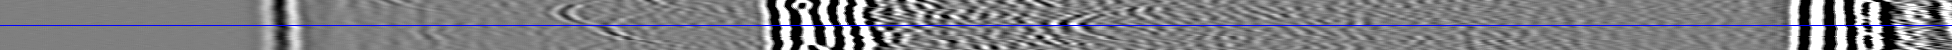

In [ ]:
img_original = im_arr1[scan_x - 25:scan_x + 25, :]
img = cv2.cvtColor(im_arr1[scan_x - 25:scan_x + 25, :],cv2.COLOR_GRAY2RGB)
img = cv2.line(img, (0, 25), (2500,25), [255,0,0], 1)
cv2_imshow(img)

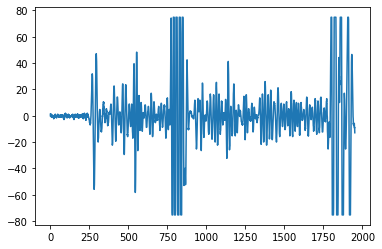

In [ ]:
A_scan['value'].plot()

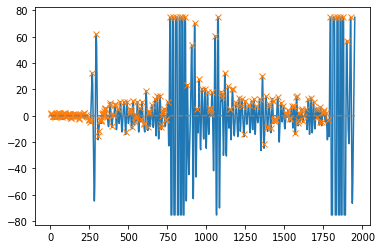

In [ ]:
x = A_scan['value']
peaks, _ = find_peaks(x)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

In [ ]:
def hl_envelopes_idx(s, dmin=1, dmax=1, split=False):
    """
    Input :
    s: 1d-array, data signal from which to extract high and low envelopes
    dmin, dmax: int, optional, size of chunks, use this if the size of the input signal is too big
    split: bool, optional, if True, split the signal in half along its mean, might help to generate the envelope in some cases
    Output :
    lmin,lmax : high/low envelope idx of input signal s
    """

    # locals min      
    lmin = (np.diff(np.sign(np.diff(s))) > 0).nonzero()[0] + 1 
    # locals max
    lmax = (np.diff(np.sign(np.diff(s))) < 0).nonzero()[0] + 1 
    

    if split:
        # s_mid is zero if s centered around x-axis or more generally mean of signal
        s_mid = np.mean(s) 
        # pre-sorting of locals min based on relative position with respect to s_mid 
        lmin = lmin[s[lmin]<s_mid]
        # pre-sorting of local max based on relative position with respect to s_mid 
        lmax = lmax[s[lmax]>s_mid]


    # global max of dmax-chunks of locals max 
    lmin = lmin[[i+np.argmin(s[lmin[i:i+dmin]]) for i in range(0,len(lmin),dmin)]]
    # global min of dmin-chunks of locals min 
    lmax = lmax[[i+np.argmax(s[lmax[i:i+dmax]]) for i in range(0,len(lmax),dmax)]]
    
    return lmin,lmax

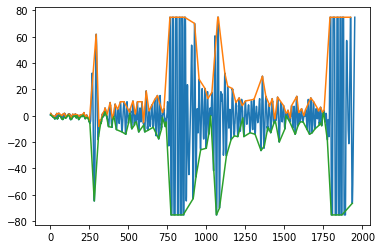

In [ ]:
low_idx, high_idx = hl_envelopes_idx(x, dmin = 3, dmax = 3) # higher the degree, higher is the stabilization
plt.plot(x)

plt.plot(x[high_idx]) # orange is for high
plt.plot(x[low_idx])  # green is for low

In [ ]:
if x[idx] > 20 and idx >= max_idx:
    current_idx = list(high_idx).index(idx)
    for i in range(idx, 0, -1):
      if x[i] < 10:
        sel_idx.append(i)
        break
  
  for i in range(idx, len(x)):
    if x[i] < 10:
      max_idx = i
      break

In [ ]:
sel_idx = []
start_idx = []
end_idx = []
max_idx = 0
ctr = 0

for idx in high_idx:
  ctr = 0
  current_idx = list(high_idx).index(idx) # outputs an index i for which list(...)[i] is equal to idx
  prev_idx = high_idx[current_idx - 1]
  
  if current_idx + 2 < len(high_idx):
    next_idx = high_idx[current_idx + 1]
    next2_idx = high_idx[current_idx + 2]
    print(x[prev_idx], x[idx], x[next_idx], idx)
    if x[idx] - x[prev_idx] > 5 and (x[idx] - x[next_idx] > 5 or x[idx] - x[next2_idx] > 5) and x[idx] > 30:
      ctr = 1
      sel_idx.append(idx)

  if ctr == 1:
    for i in range(current_idx, 0, -1):
      check_idx1 = high_idx[i]
      check_idx2 = high_idx[i - 1]
      if x[check_idx2] > x[check_idx1] :
        print("appended", i)
        start_idx.append(check_idx1)
        break

    for i in range(current_idx, len(high_idx)):
      check_idx1 = high_idx[i]
      check_idx2 = high_idx[i + 1]
      if x[check_idx2] > x[check_idx1] :
        print("appended", i)
        end_idx.append(check_idx1)
        break

sel_idx

74.71 1.77 0.59 2
1.77 0.59 0.0 8
0.59 0.0 -0.58 17
0.0 -0.58 0.0 24
-0.58 0.0 1.77 34
0.0 1.77 1.18 41
1.77 1.18 1.77 43
1.18 1.77 1.77 52
1.77 1.77 0.59 56
1.77 0.59 0.0 67
0.59 0.0 1.18 76
0.0 1.18 1.77 80
1.18 1.77 1.77 89
1.77 1.77 -0.58 91
1.77 -0.58 0.59 97
-0.58 0.59 1.18 110
0.59 1.18 1.18 115
1.18 1.18 1.18 119
1.18 1.18 -1.76 124
1.18 -1.76 0.59 130
-1.76 0.59 1.18 141
0.59 1.18 0.59 143
1.18 0.59 1.18 154
0.59 1.18 1.18 158
1.18 1.18 0.59 161
1.18 0.59 0.59 172
0.59 0.59 -0.58 174
0.59 -0.58 0.59 188
-0.58 0.59 0.59 191
0.59 0.59 1.18 197
0.59 1.18 2.36 210
1.18 2.36 0.59 215
2.36 0.59 -0.58 217
0.59 -0.58 0.59 228
-0.58 0.59 -0.58 230
0.59 -0.58 -2.35 237
-0.58 -2.35 -3.52 244
-2.35 -3.52 61.77 250
-3.52 61.77 -8.23 293
appended 37
appended 39
61.77 -8.23 -3.52 311
-8.23 -3.52 -3.52 317
-3.52 -3.52 1.18 324
-3.52 1.18 1.77 333
1.18 1.77 3.53 335
1.77 3.53 5.89 346
3.53 5.89 4.12 350
5.89 4.12 0.0 355
4.12 0.0 10.0 361
0.0 10.0 -2.93 383
10.0 -2.93 0.59 398
-2.93 0.59 8.83 

[293, 1073]

In [ ]:
def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

250
1009


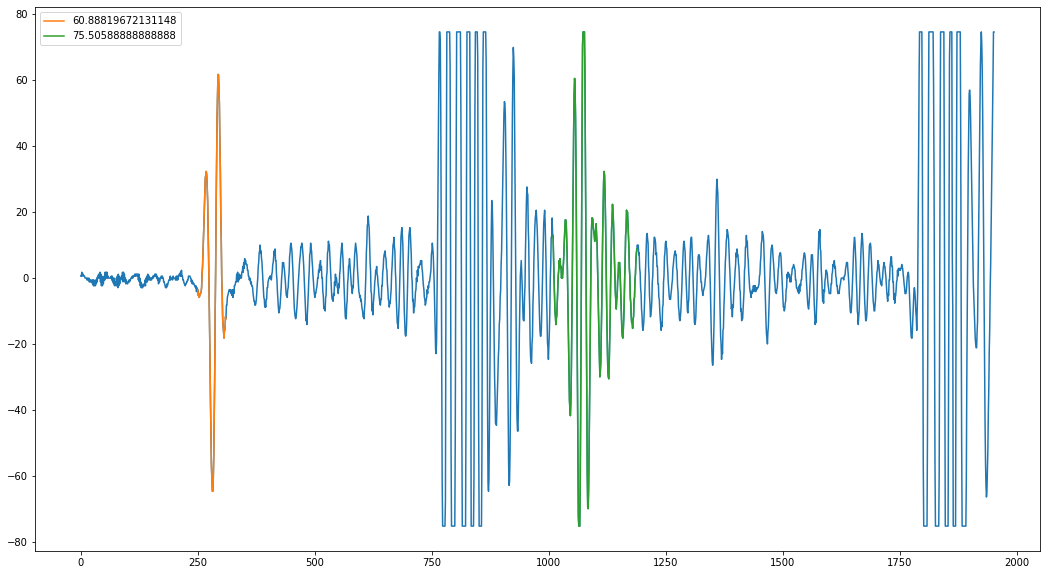

In [ ]:
figure = plt.figure(figsize=(18, 10))
plt.plot(x)
for i in range(len(start_idx)):
  print(start_idx[i])
  roi = x[start_idx[i]:end_idx[i]]
  #figure = plt.figure(figsize=(15, 5))
  #plt.plot(roi)
  plt.plot(roi, label = str(roi.max() - roi.mean()))
plt.legend()

250
44.707142857142856
268
281
1009
53.736
1055
1064


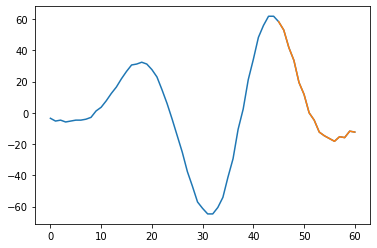

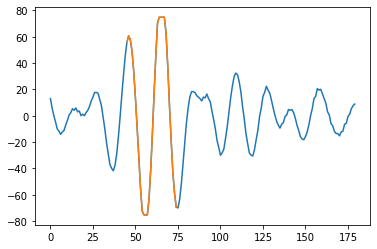

In [ ]:
for i in range(len(start_idx)):
  print(start_idx[i])
  roi = x[start_idx[i]:end_idx[i]].reset_index(drop = True)
  low_idx, high_idx = hl_envelopes_idx(roi, dmin = 1, dmax = 1)
  figure = plt.figure()
  plt.plot(roi)
  #plt.plot(roi[high_idx])
  print(roi.max() - roi[high_idx].mean())
  
  peak_index = list(high_idx).index(list(roi).index(roi[high_idx].max()))
  for idx in range(peak_index, 0, -1):
    if roi[high_idx[idx]] < roi.max()/4:
      s_idx = high_idx[idx + 1]
      break

  #for idx in range(peak_index, len(high_idx)):
    #if roi[high_idx[idx]] < roi.max()/3:
      #e_idx = high_idx[idx - 1]
      #break

  trough_index = list(low_idx).index(list(roi).index(roi[low_idx].min()))

  #for idx in range(trough_index, 0, -1):
  #  if roi[low_idx[idx]] < roi.max()/3:
  #    if s_idx > low_idx[idx + 1]:
  #      s_idx = low_idx[idx + 1]
  #    break

  for idx in range(trough_index, len(low_idx)):
    if roi[low_idx[idx]] < roi.max()/4:
     #if e_idx < low_idx[idx - 1]:
     e_idx = low_idx[idx ]
     break
  print(s_idx + start_idx[i])
  print(e_idx + start_idx[i])
  plt.plot(roi[45: 75])
  

233.67231991555542
1121.7757055155557
1016.5642369822225
579.5427975155555
2840.643083666667
3142.9594686266696
3398.6213808888897
2823.2591462933356
1589.9527115555547
625.3181089288889
314.96532366222215
815.7699996622224
857.7754911822221
393.16106344888897
404.21490766222195
2957.689926795555
3347.121619999999
3558.4843405555575
3213.047528255929
2633.2389835381173


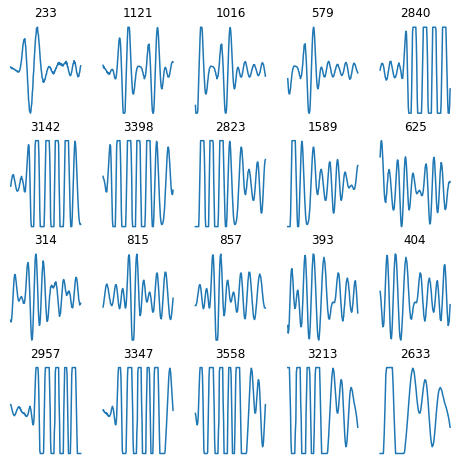

In [ ]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 5, 4
for i in range(1, len(sel_idx) + 1):
    roi = x[sel_idx[i-1] - 50:sel_idx[i-1] + 100]
    print(np.var(roi))
    figure.add_subplot(rows, cols, i)
    plt.title(str(int(np.var(roi))))
    plt.axis("off")
    plt.plot(roi)
plt.show()


In [ ]:
#lateral wall
lw_idx = sel_idx[0]
lw_roi = x[lw_idx - 50:lw_idx + 100]
plt.plot(lw_roi)
plt.plot(lw_roi[abs(lw_roi) > 20])

In [ ]:
top_idx = []
bottom_idx = []

for idx in sel_idx:
  roi = x[idx - 50:idx + 100]
  thresh = roi.max() - 25
  top_idx.append(roi[abs(roi) > thresh].index[0])
  print(roi[abs(roi) > 20].index[0])
  bottom_idx.append(roi[abs(roi) > thresh].index[-1])
  print(roi[abs(roi) > 2].index[-1])


In [ ]:
img_original = im_arr1[scan_x - 25:scan_x + 25, :]
img = cv2.cvtColor(im_arr1[scan_x - 25:scan_x + 25, :],cv2.COLOR_GRAY2RGB)
img = cv2.line(img, (0, 25), (2500,25), [255,0,0], 1)
for i in range(len(top_idx)):
  img = cv2.line(img, (top_idx[i], 0), (top_idx[i], 50), [255, 0, 0], 1)
  img = cv2.line(img, (bottom_idx[i], 0), (bottom_idx[i], 50), [0, 0, 255], 1)
cv2_imshow(img)

In [ ]:
im_arr.shape

In [ ]:
top_coordinates = []
bottom_coordinates = []
for scan_x in range(int(im_arr.shape[0]/4)):
  A_scan = pd.DataFrame()
  A_scan['value'] = im_arr[scan_x]
  x = A_scan['value']

  low_idx, high_idx = hl_envelopes_idx(x, dmin = 3, dmax = 3)

  start_idx = []
  end_idx = []

  max_idx = 0
  for idx in high_idx:
    ctr = 0
    current_idx = list(high_idx).index(idx)
    prev_idx = high_idx[current_idx - 1]
    if current_idx + 1 < len(high_idx):
      next_idx = high_idx[current_idx + 1]
      if x[idx] - x[prev_idx] > 10 and (x[idx] - x[next_idx] > 10 or x[idx] - x[next2_idx] > 10) and x[idx] > 30:
        ctr = 1

    if ctr == 1:
      for i in range(current_idx, 0, -1):
        check_idx1 = high_idx[i]
        check_idx2 = high_idx[i - 1]
        if x[check_idx2] > x[check_idx1] :
          start_idx.append(check_idx1)
          break

      for i in range(current_idx, len(high_idx)):
        check_idx1 = high_idx[i]
        if i+1 < len(high_idx):
          check_idx2 = high_idx[i + 1]
        else:
          end_idx.append(check_idx1)
          break
        if x[check_idx2] > x[check_idx1] :
          end_idx.append(check_idx1)
          break

      s_idx = []
      e_idx = []
      for i in range(len(start_idx)):
        roi = x[start_idx[i]:end_idx[i]].reset_index(drop = True)
        low_idx_, high_idx_ = hl_envelopes_idx(roi, dmin = 1, dmax = 1)
        #plt.plot(roi[high_idx_])

        peak_index = list(high_idx_).index(list(roi).index(roi[high_idx_].max()))
        for idx_ in range(peak_index, 0, -1):
          if roi[high_idx_[idx_]] < roi.max()/3:
            s_idx_ = high_idx_[idx_]
            break

        for idx_ in range(peak_index, len(high_idx_)):
          if roi[high_idx_[idx_]] < roi.max()/3:
            e_idx_ = high_idx_[idx_ - 1]
            break

        trough_index = list(low_idx_).index(list(roi).index(roi[low_idx_].min()))

        for idx_ in range(trough_index, 0, -1):
          if roi[low_idx_[idx_]] < roi.max()/3:
            if s_idx_ > low_idx_[idx_]:
              s_idx_ = low_idx_[idx_]
            break

        for idx_ in range(trough_index, len(low_idx_)):
          if roi[low_idx_[idx_]] < roi.max()/3:
            if e_idx_ < low_idx_[idx_ - 1]:
              e_idx_ = low_idx_[idx_ - 1]
            break

        if roi.max() - roi[high_idx_].mean() > 30:
          s_idx.append(s_idx_ + start_idx[i])
          e_idx.append(e_idx_ + start_idx[i])

    
  for i in range(len(s_idx)):
    top_coordinates.append([scan_x, s_idx[i]])
    bottom_coordinates.append([scan_x, e_idx[i]])

  

    


ValueError: ignored

In [ ]:
img_original = im_arr1
img = cv2.cvtColor(im_arr1, cv2.COLOR_GRAY2RGB)
for i in range(len(top_coordinates)):
  print(top_coordinates[i])
  img = cv2.circle(img, tuple(top_coordinates[i][::-1]), 0, [255, 0, 0], 2)
  img = cv2.circle(img, tuple(bottom_coordinates[i][::-1]), 0, [0, 0, 255], 2)
cv2_imshow(img)

Output hidden; open in https://colab.research.google.com to view.